In [7]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

#pd.set_option("display.max_rows", 100)

In [92]:
event_list = []
for file in os.listdir("./game_num_data/")[1:]:
    lst = pd.read_csv("./game_num_data/"+file, encoding="cp932", index_col=0, dtype="object").values.flatten()
    new_lst = []
    for i in range(len(lst)):
        new_lst.append(lst[i])
        if i < len(lst)-1 and lst[i][0] == "2" and lst[i+1][0] == "1":
            new_lst.append("3000")
            new_lst.append("0000")
    event_list += list(new_lst) + ["GAMESET"]
    #if len(event_list) > 5286:
    #    print(file)

In [88]:
"""for i in range(len(event_list)):
    if event_list[i] == "2000" and event_list[i+1] == "1000":
        print(i)"""

'for i in range(len(event_list)):\n    if event_list[i] == "2000" and event_list[i+1] == "1000":\n        print(i)'

In [95]:
len(event_list)

65493

In [96]:
len(event_list) / len(os.listdir("./game_num_data/")[1:])

97.1706231454006

In [97]:
len(set(event_list))

26

In [98]:
triple_transfer_list = []
for i in range(2, len(event_list)):
    before, curr, after = event_list[i-2], event_list[i-1], event_list[i]
    if "GAMESET" in [before, curr, after]:
        continue
    if before == "3000" or curr == "3000":
        continue
    triple_transfer_list.append((before, curr, after))

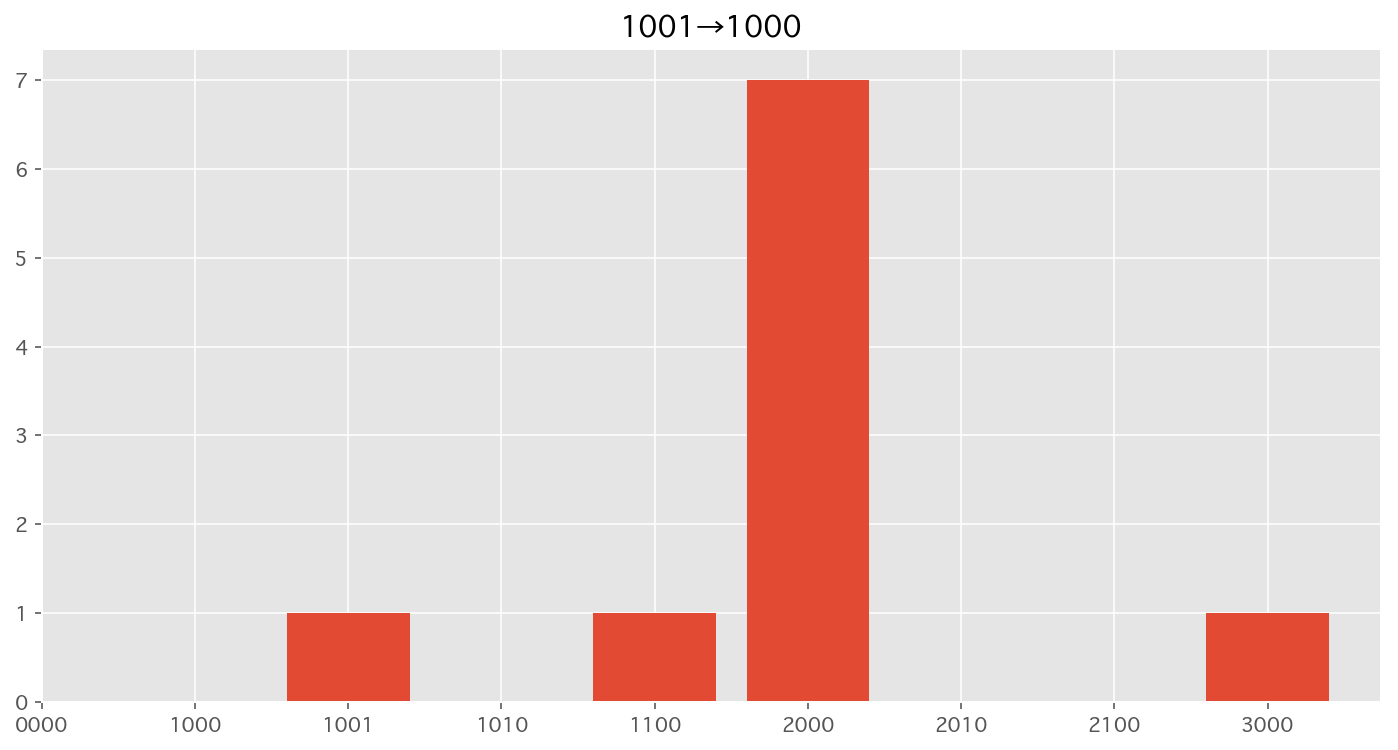

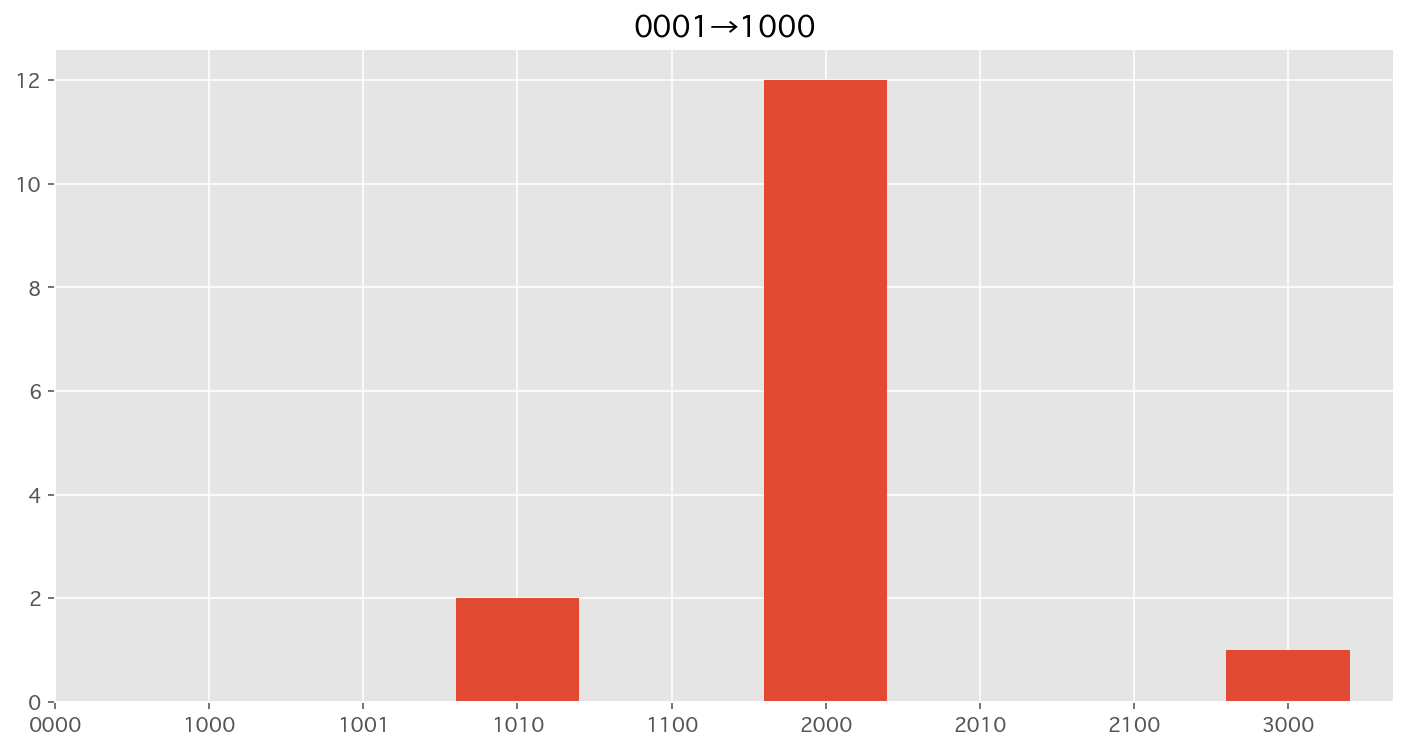

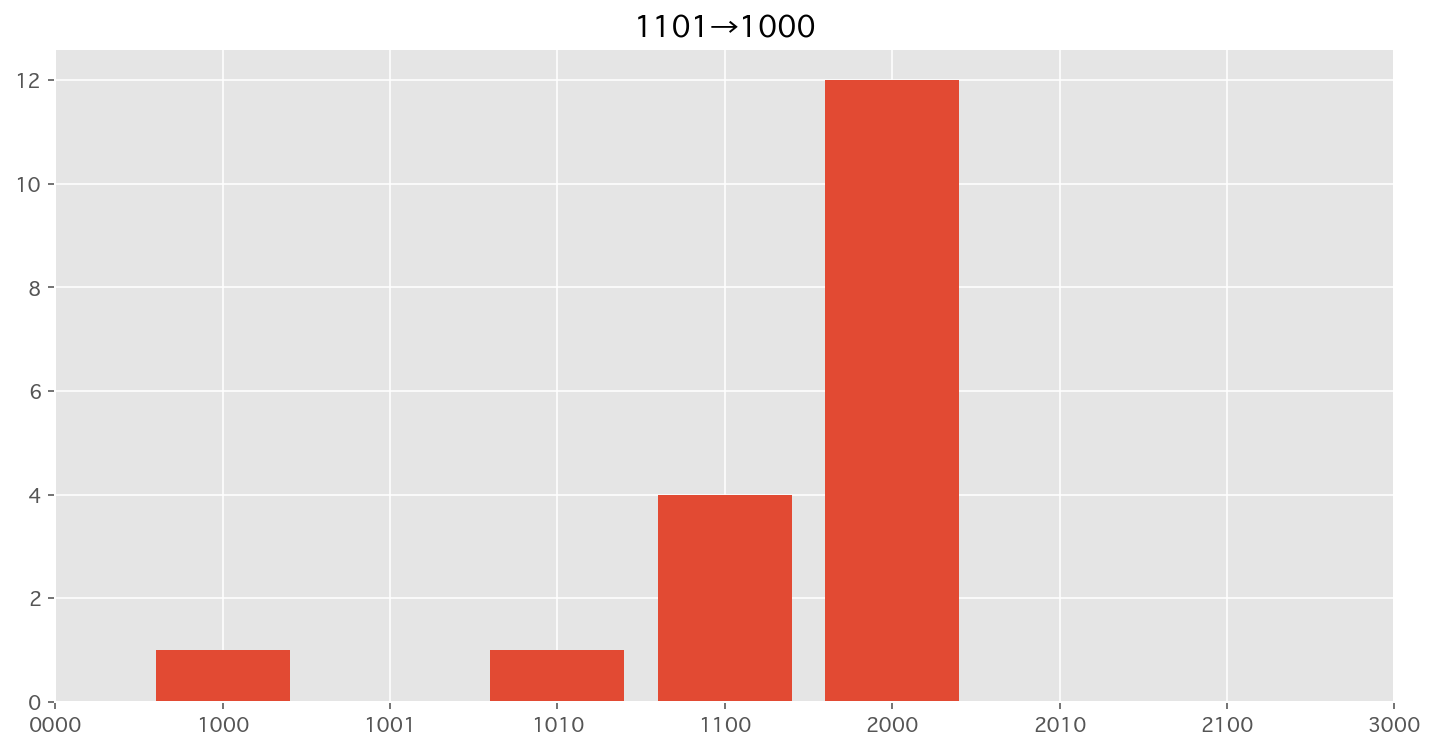

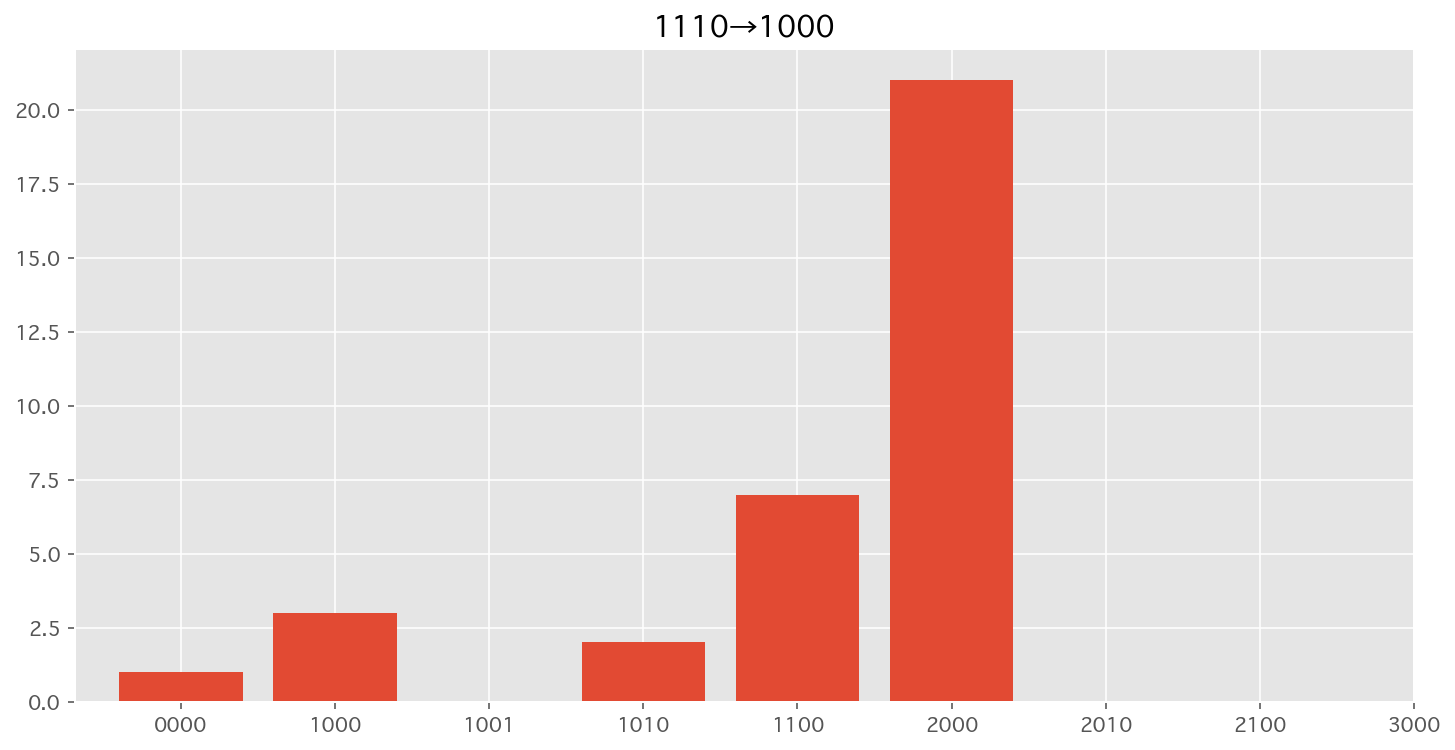

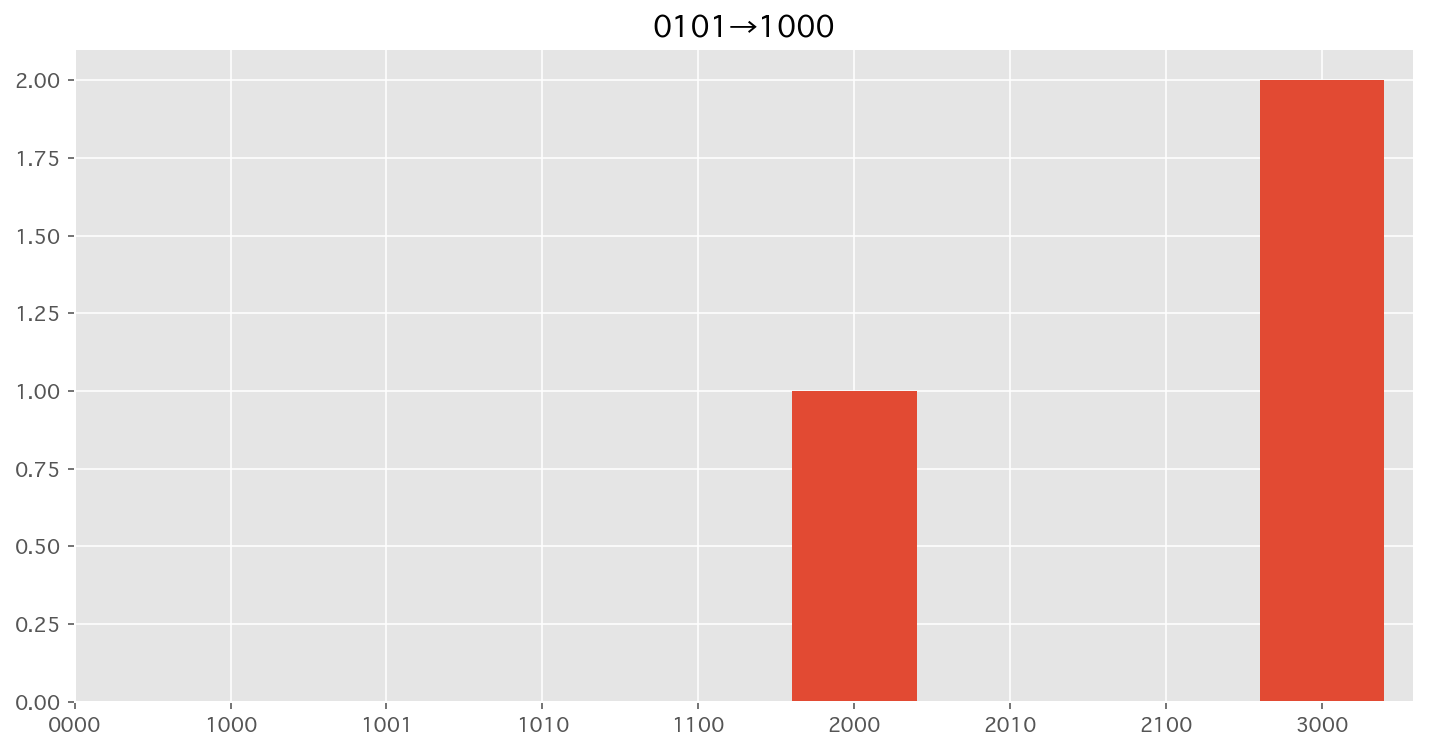

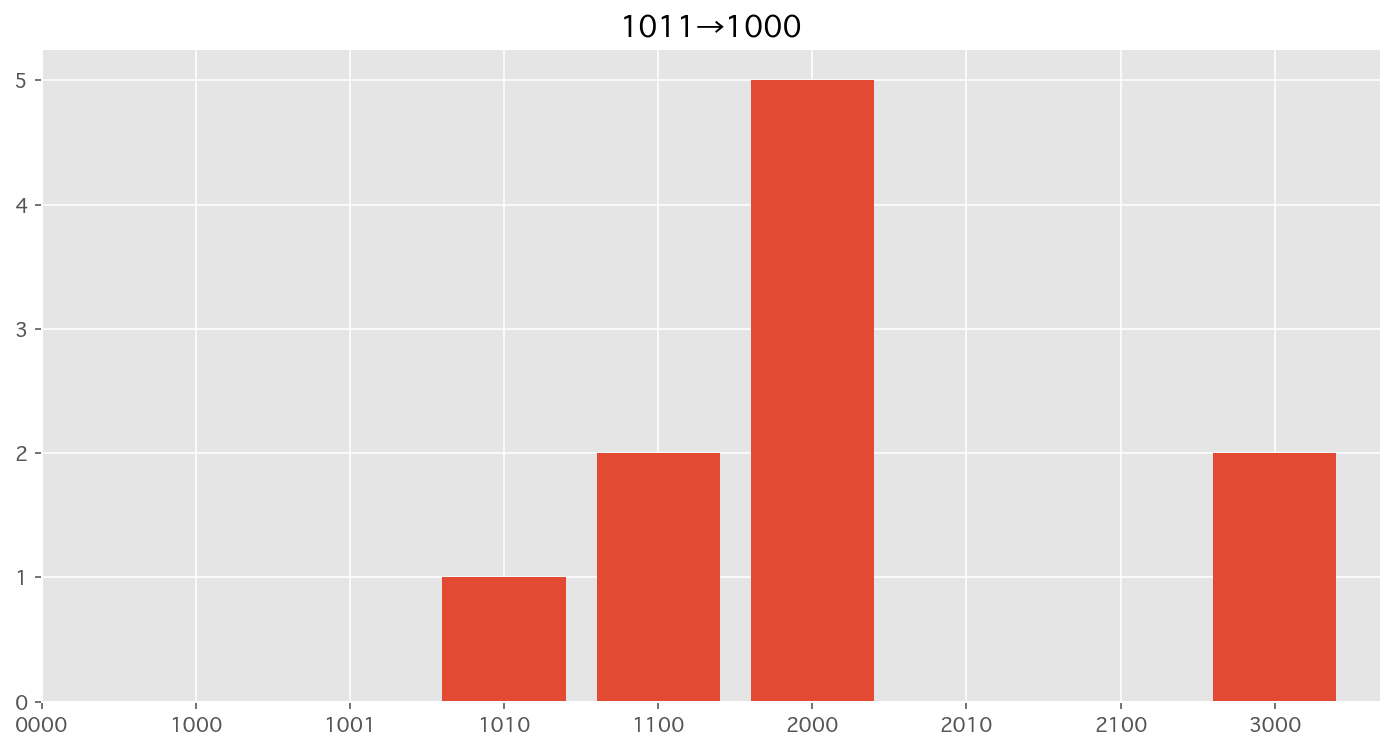

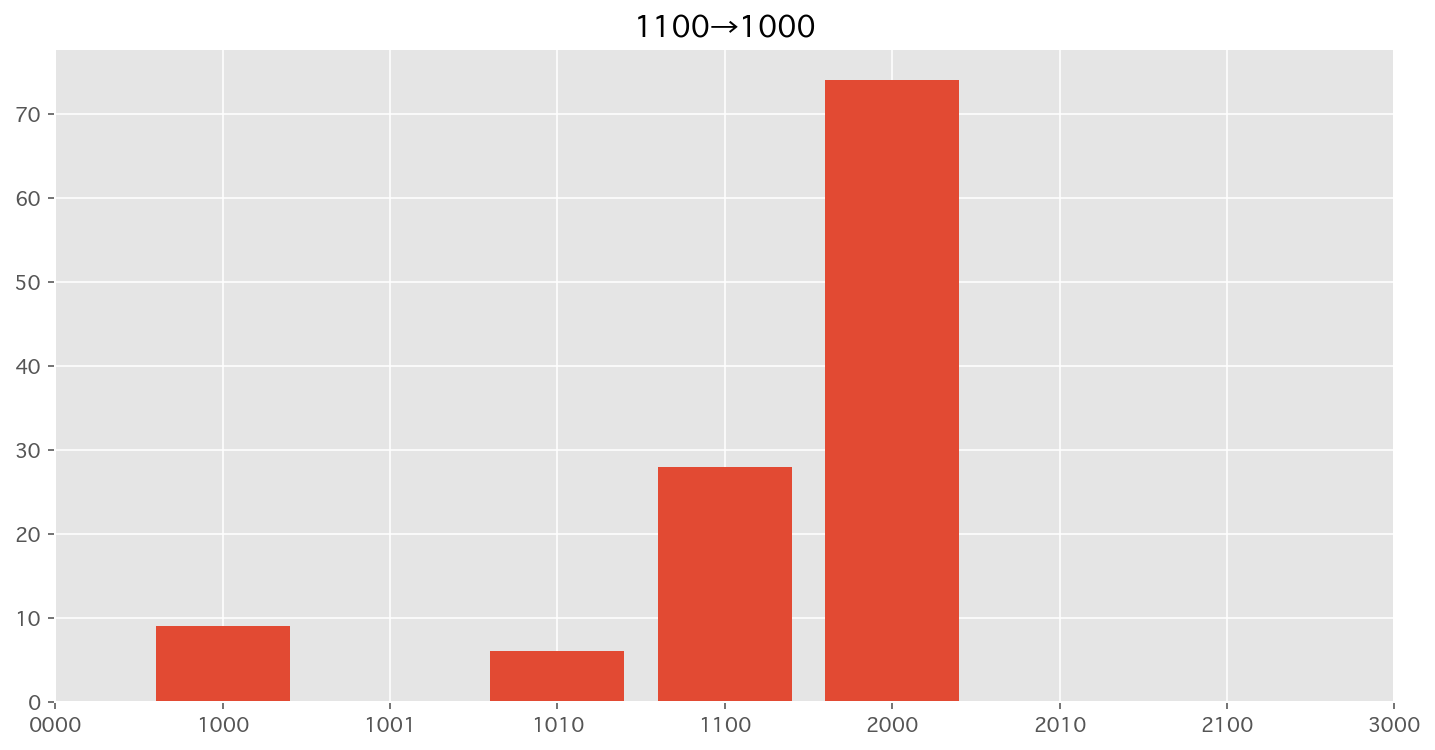

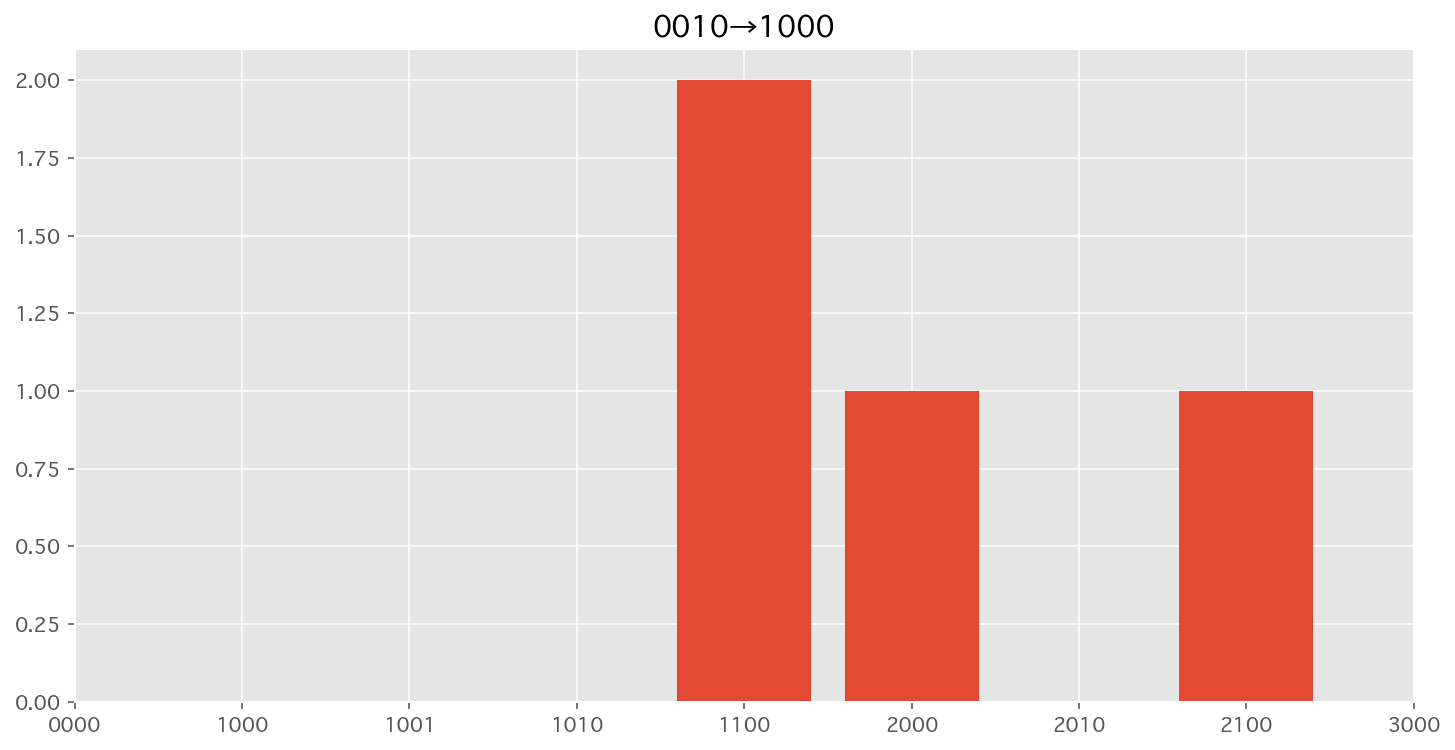

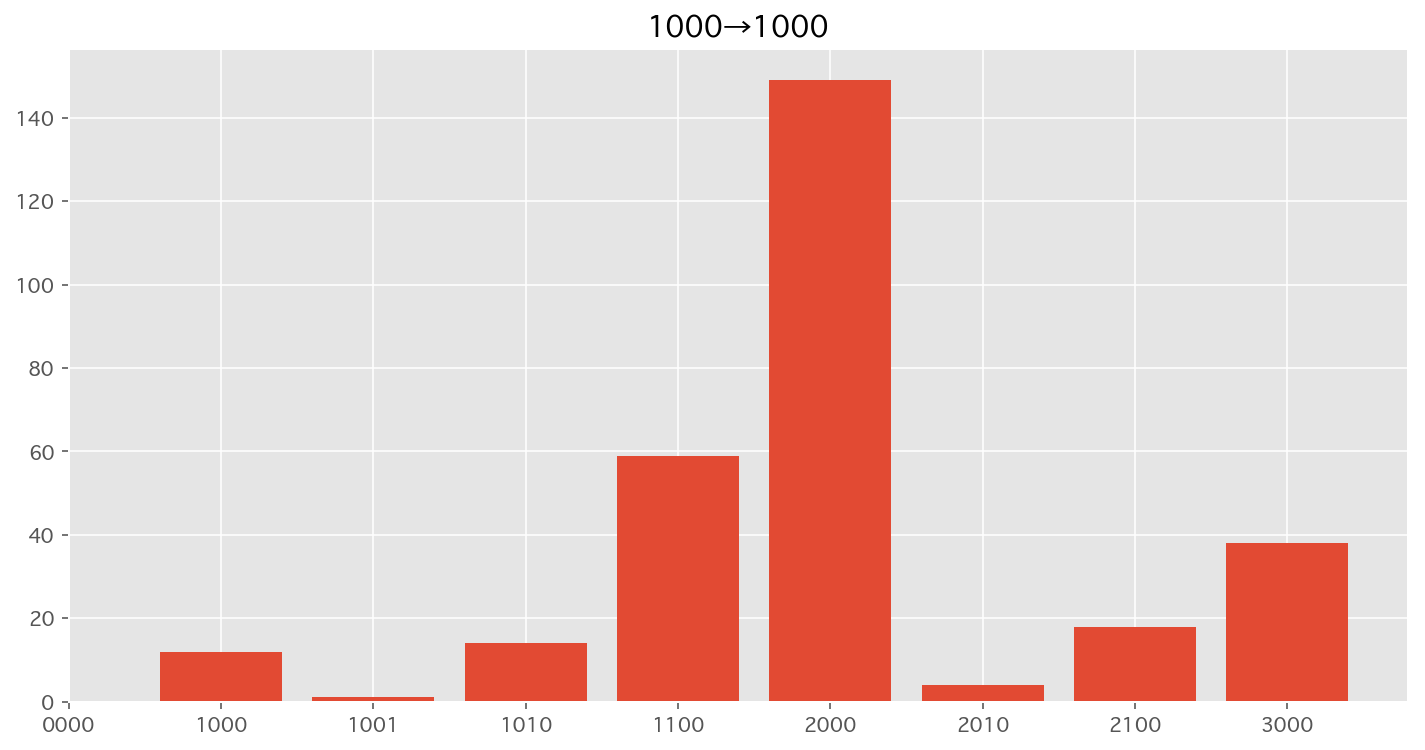

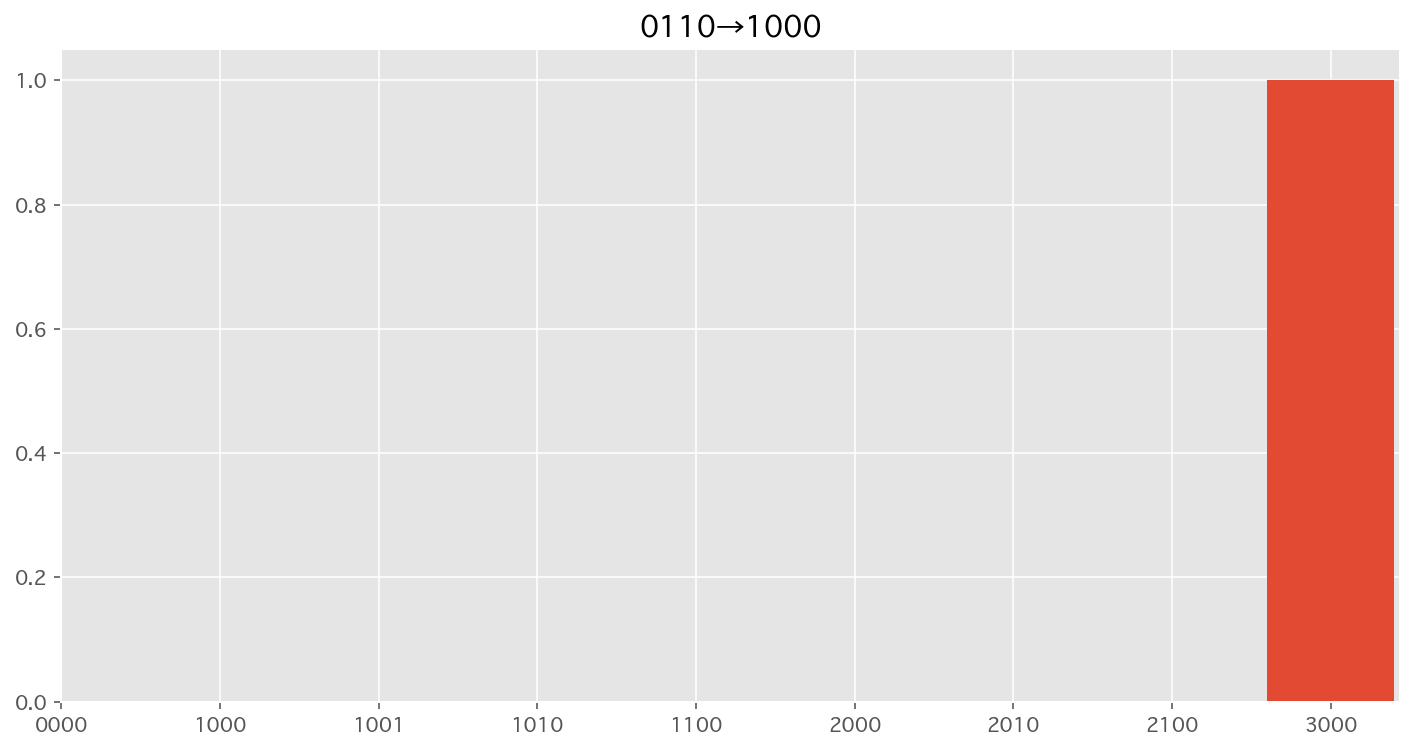

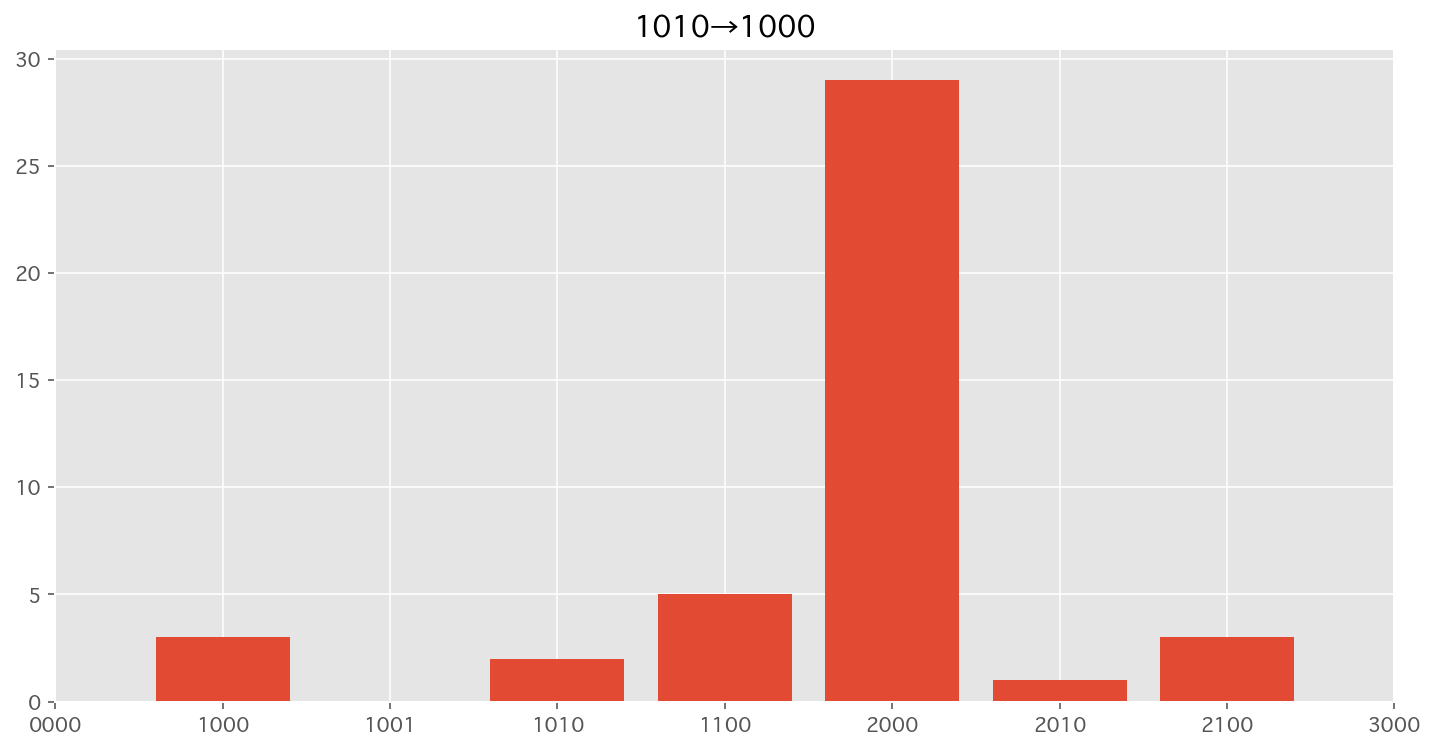

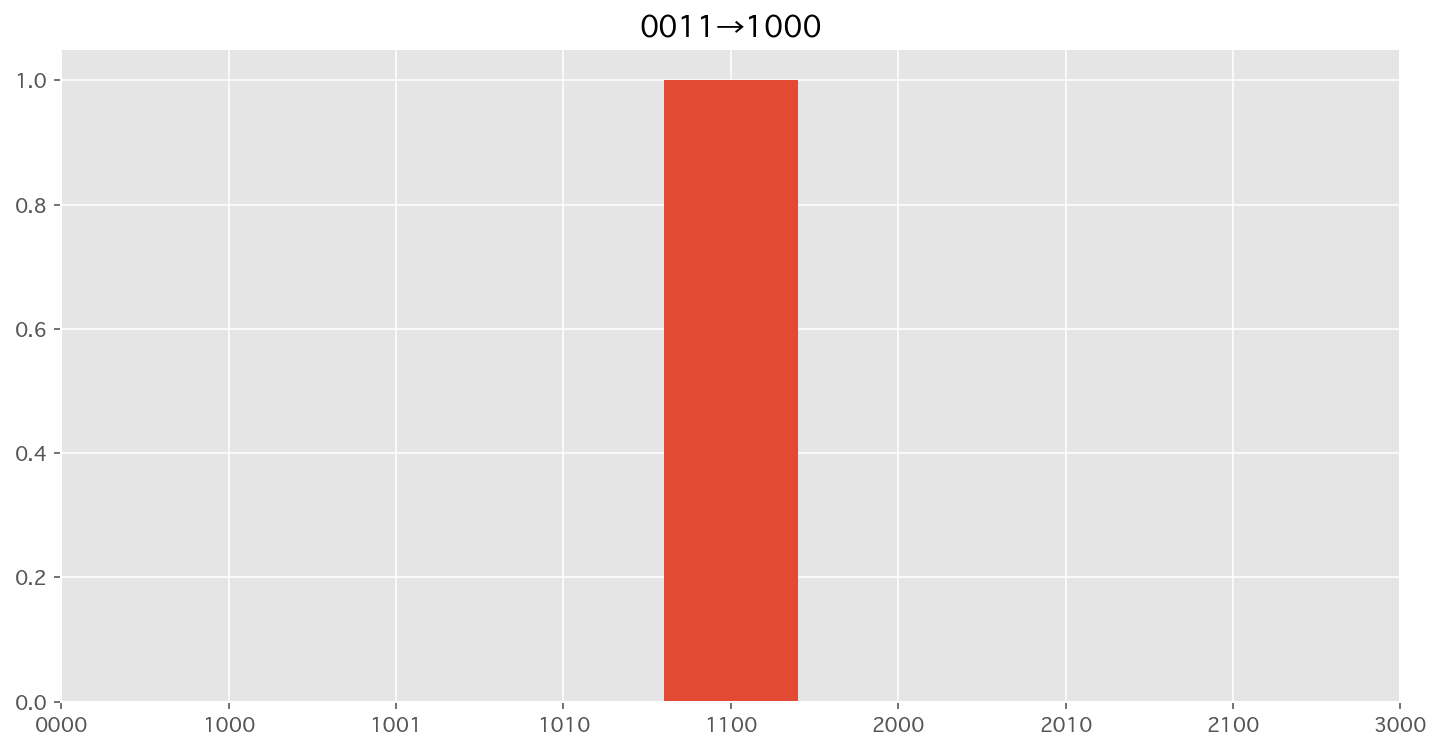

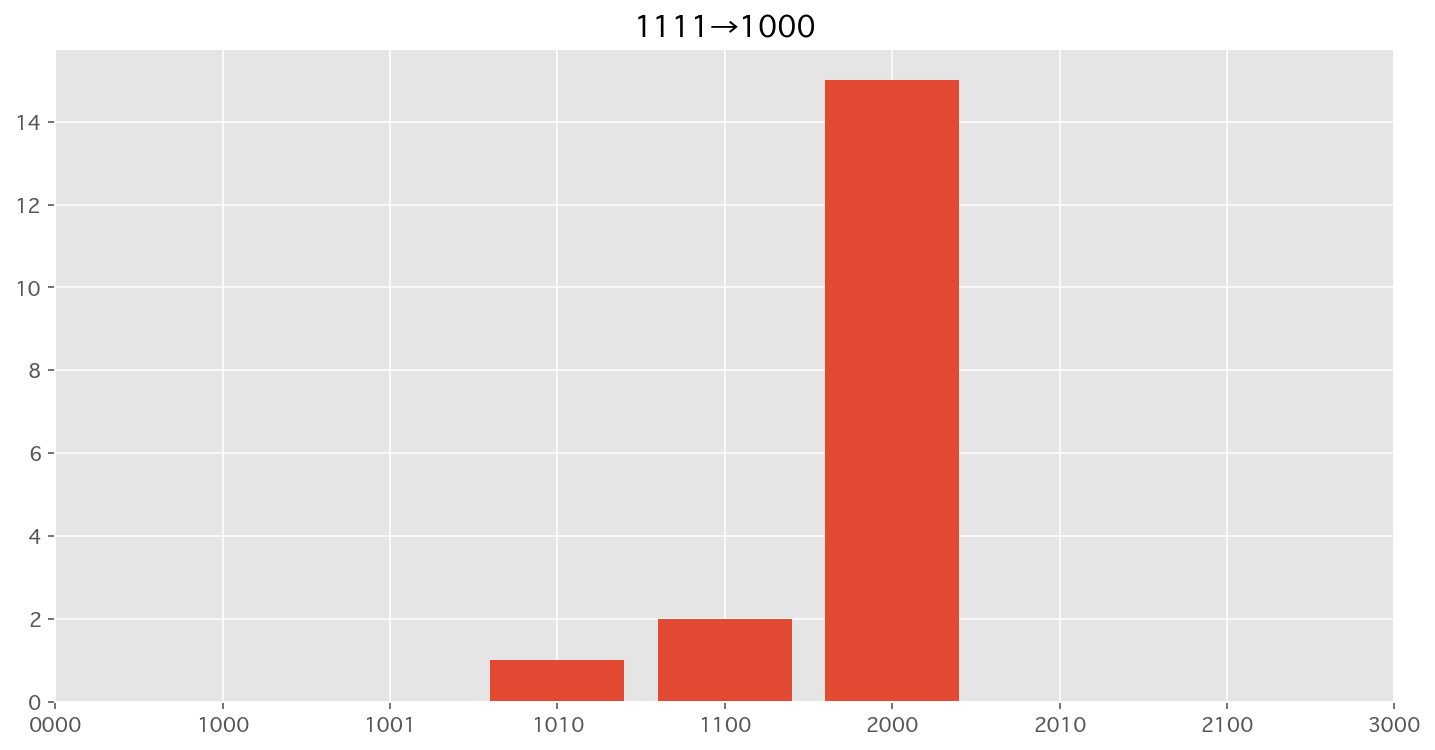

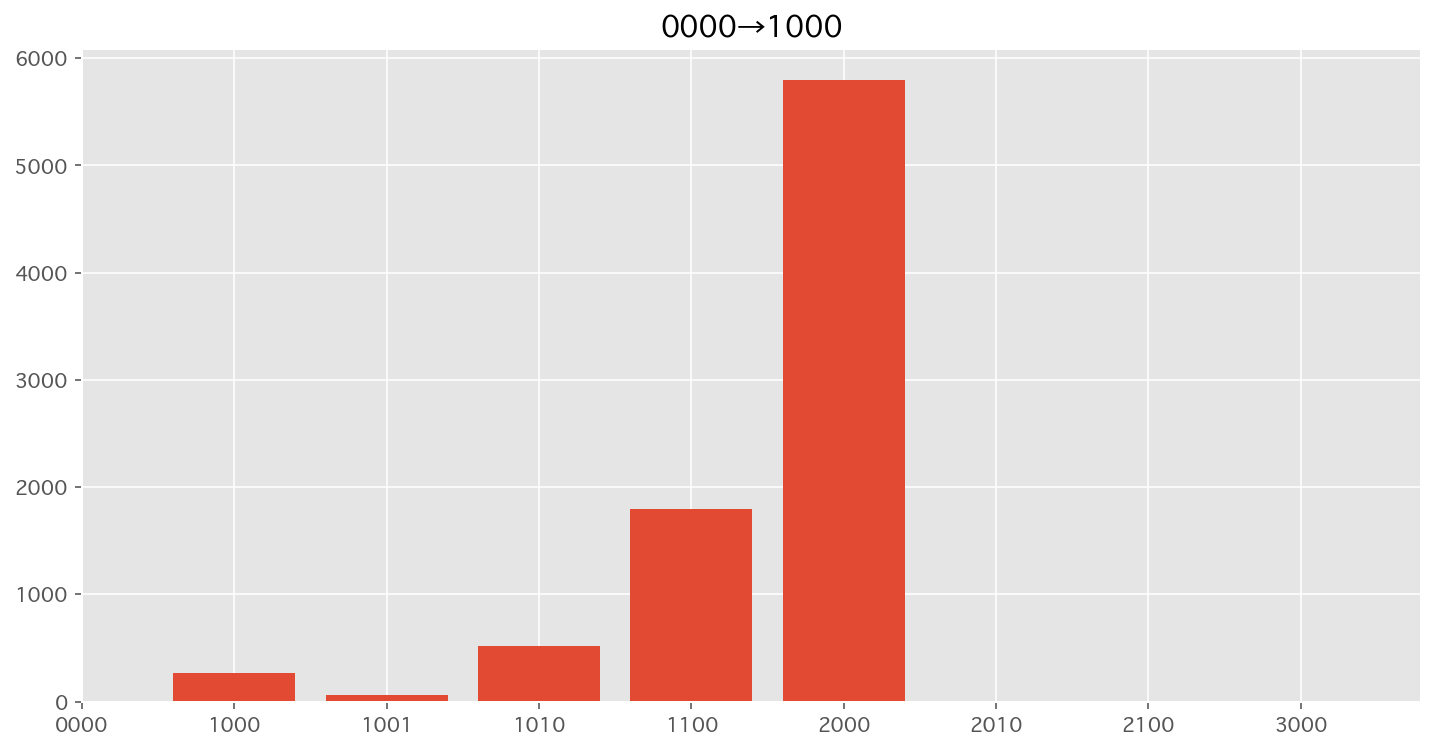

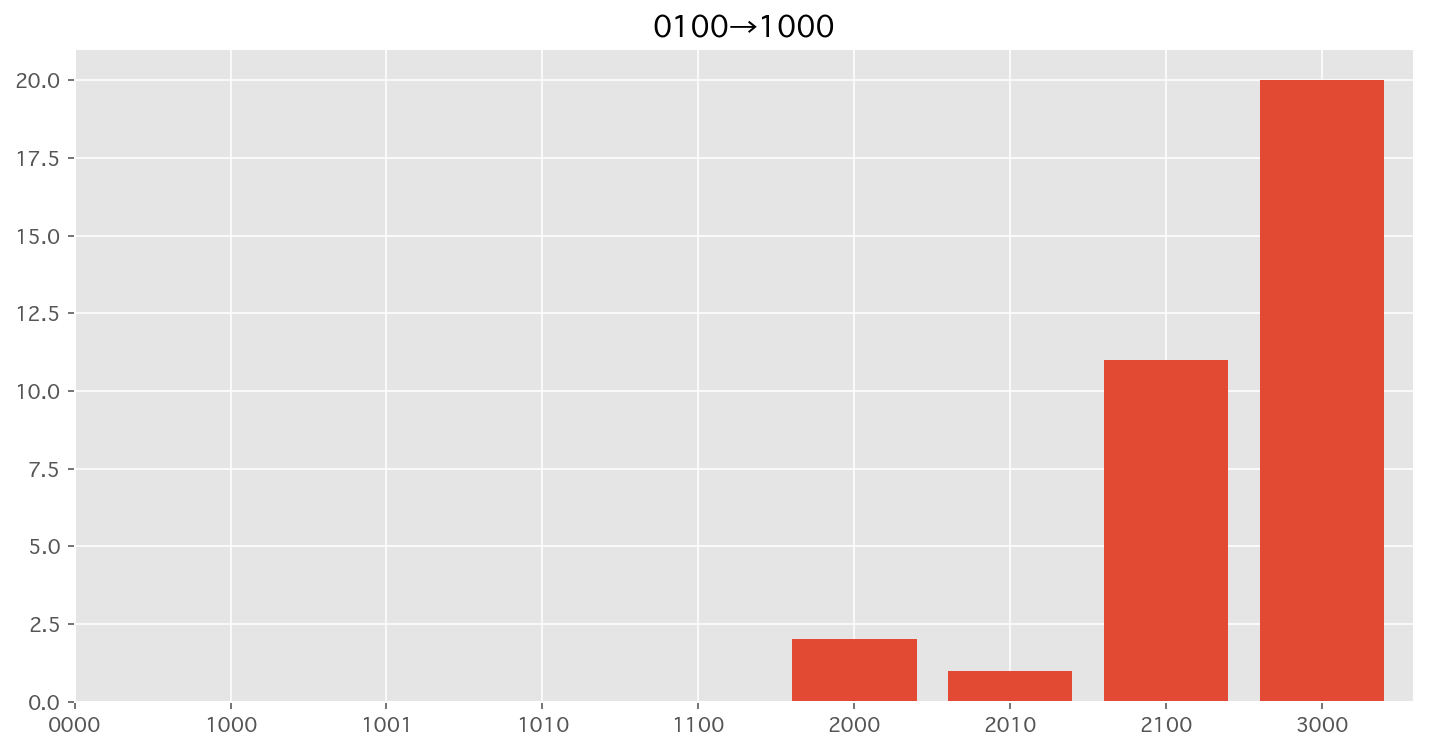

In [99]:
# columns = before, index = after
curr = "1000"
ba_list = []
for elem in triple_transfer_list:
    if elem[1] == curr:
        ba_list.append((elem[0], elem[2]))
ba_dict = defaultdict(list)
for elem in ba_list:
    ba_dict[elem[0]].append(elem[1])
df_list = []
for k, v in ba_dict.items():
    counter = Counter(v)
    _df = pd.DataFrame(list(counter.values()), index=list(counter.keys()))
    _df.columns = [k]
    df_list.append(_df)
df = pd.concat(df_list, join="outer", axis=1)
#length = len(df.columns)
for column in df.columns:
    plt.figure(figsize=(12, 6))
    plt.bar(list(range(len(df[column]))), df[column])
    plt.xticks(list(range(len(df[column]))), df.index)
    plt.legend()
    plt.title(column+"→"+curr)
    plt.show()

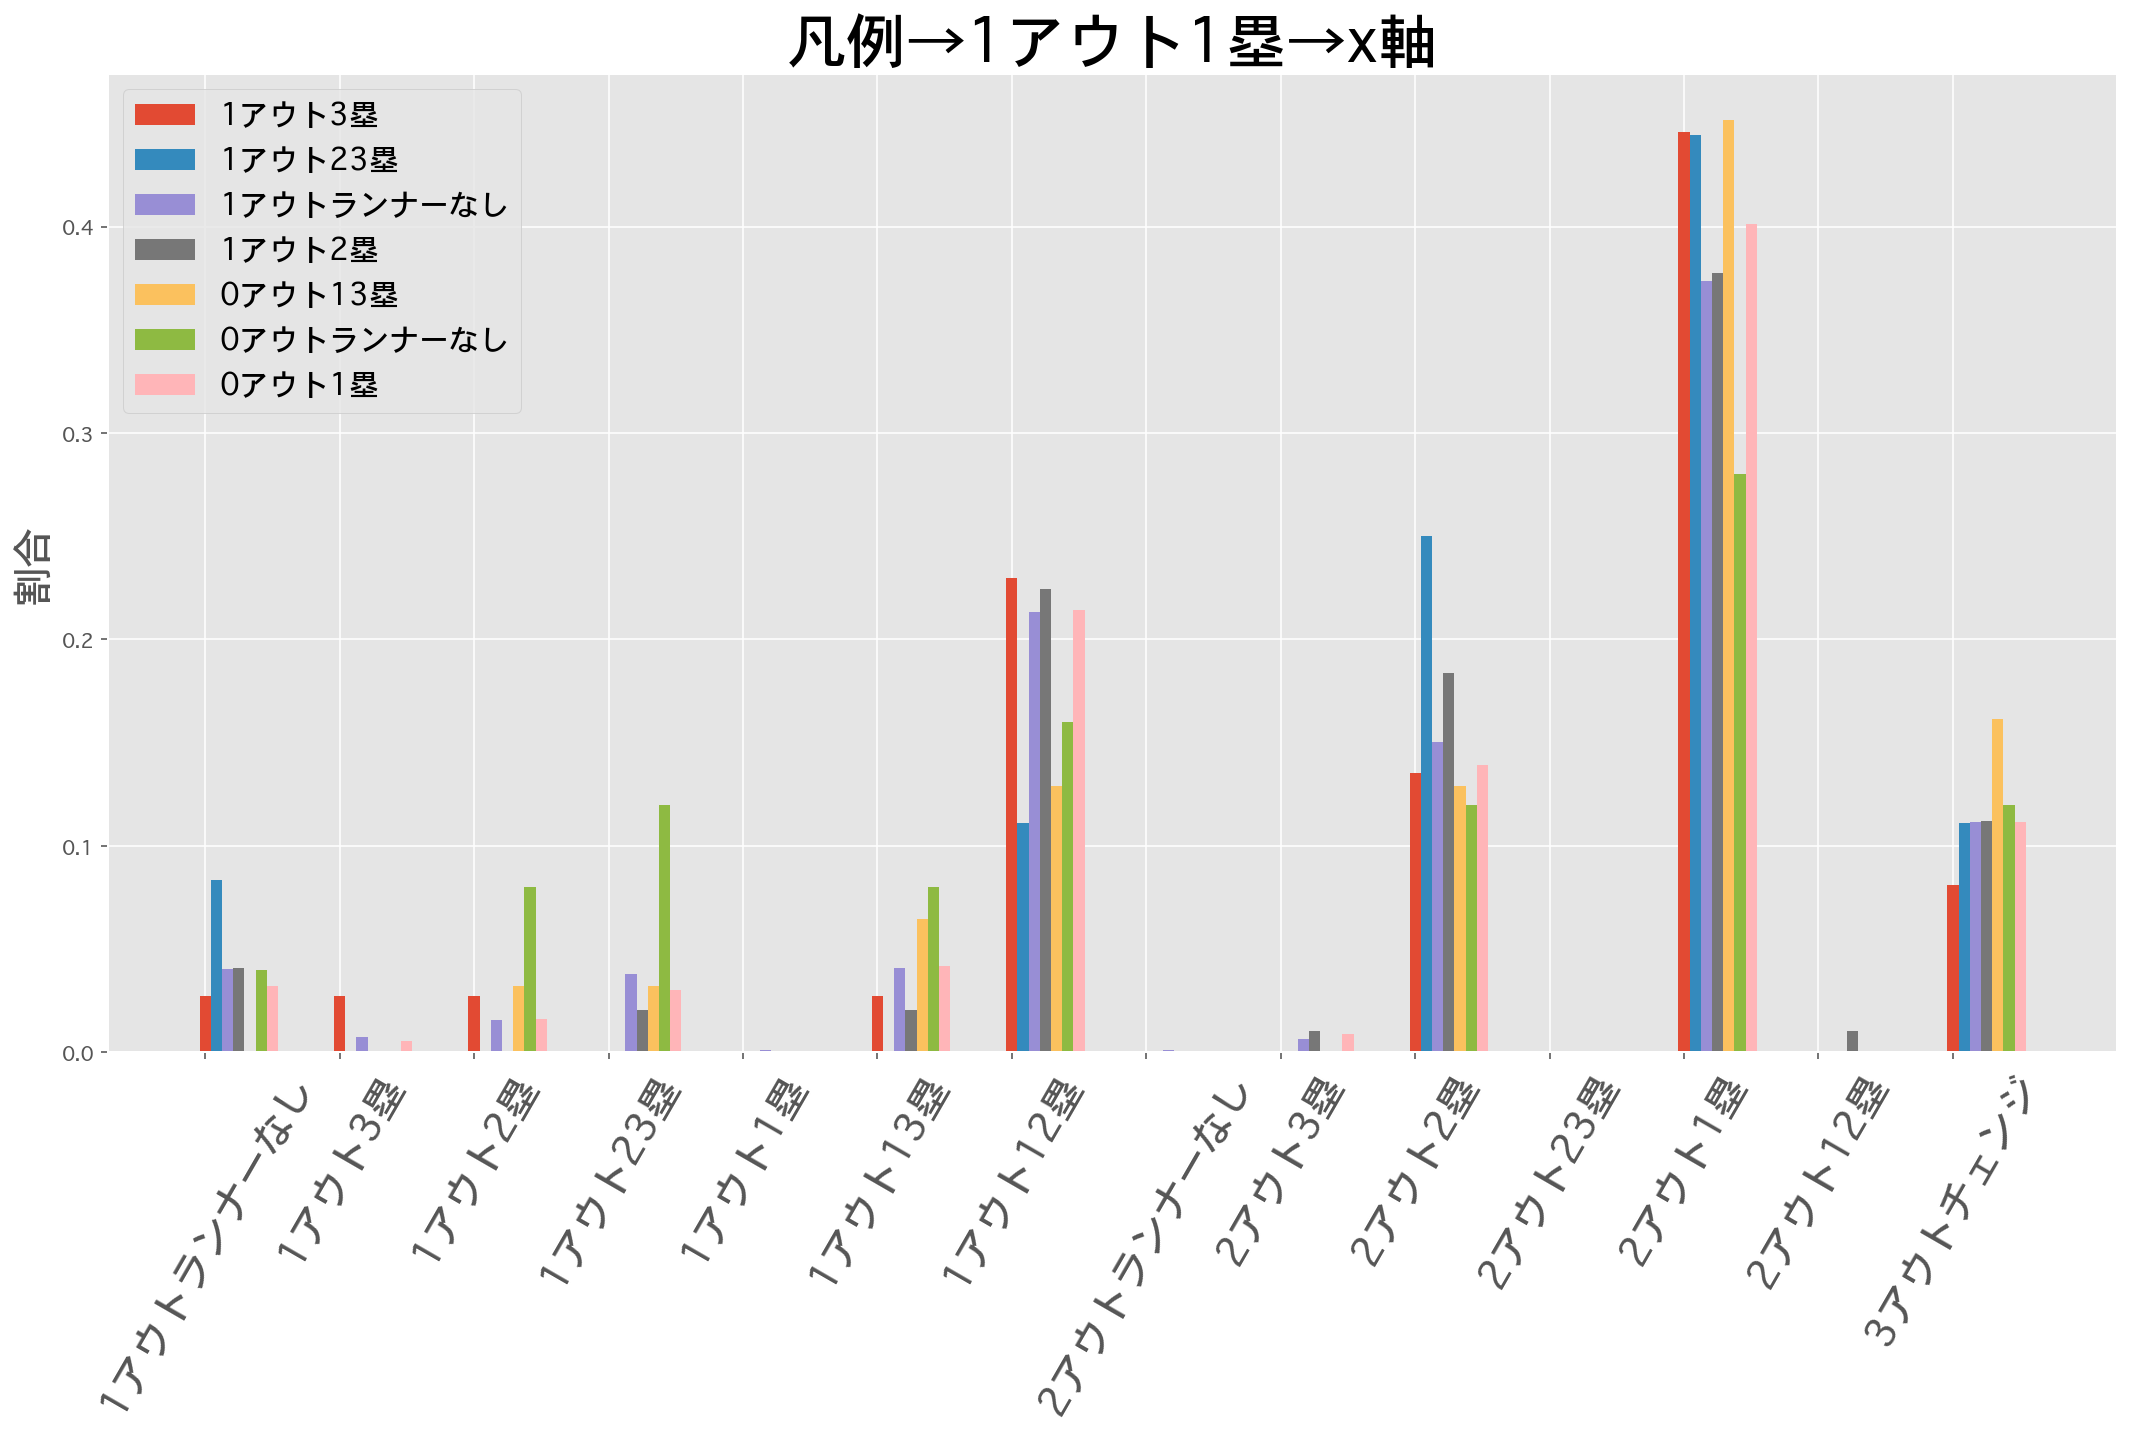

In [142]:
# columns = before, index = after
curr = "1100"
ba_list = []
for elem in triple_transfer_list:
    if elem[1] == curr:
        ba_list.append((elem[0], elem[2]))
ba_dict = defaultdict(list)
for elem in ba_list:
    ba_dict[elem[0]].append(elem[1])
df_list = []
for k, v in ba_dict.items():
    counter = Counter(v)
    _df = pd.DataFrame(list(counter.values()), index=list(counter.keys()))
    _df.columns = [k]
    df_list.append(_df)
df = pd.concat(df_list, join="outer", axis=1)
length = len(df.columns)
idx = 0
used_columns = []
plt.figure(figsize=(18, 9))
for column in df.columns:
    if df[column].sum() > 10:
        plt.bar(np.array(list(range(len(df[column]))))+idx*1/length, df[column]/df[column].sum(), width=1/length)
        idx += 1
        used_columns.append(column)
plt.xticks(list(range(len(df[column]))), [decode_count(index) for index in df.index], rotation=60, fontsize=20)
plt.legend([decode_count(column) for column in used_columns], loc="upper left", fontsize=15)
plt.title("凡例→"+decode_count(curr)+"→x軸", fontsize=30)
plt.ylabel("割合", fontsize=20)
plt.show()

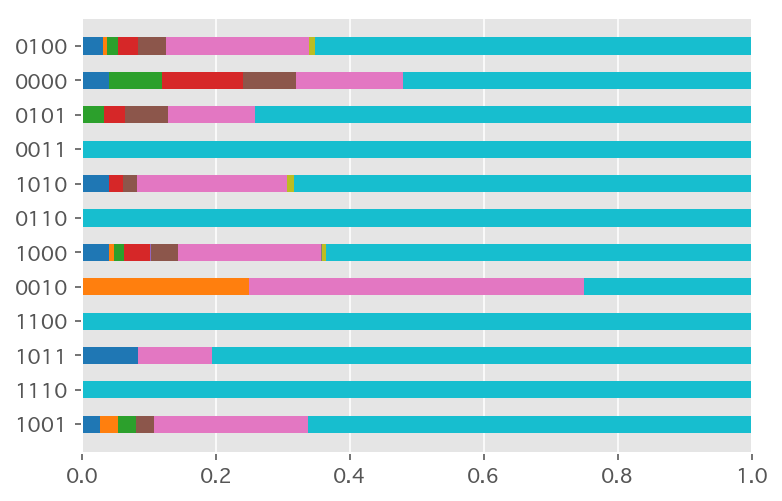

In [252]:
#plt.barh(left=[1, 2], height=[1, 1], width=[2, 4], bottom=[1, 2], alpha=0.5)
idx = 0
df = df.fillna(0)
for column in df.columns:
    #cmap = plt.get_cmap("tab10")
    cum = 0
    s = df[column].sum()
    #print(column)
    i = 0
    for index in df[column].index:
        curr = df[column][index]
        #print(cum)
        plt.barh(left=[cum/s], height=[0.5], width=[curr/s], bottom=[idx], color=cmap(i))
        cum += curr
        i += 1
        #print(s)
    idx += 1
plt.yticks([idx for idx in range(len(df.columns))], df.columns)
plt.show()

In [241]:
df.index[0]

'1000'

In [219]:
df

,1001,1110,1011,1100,0010,1000,0110,1010,0011,0101,0000,0100
1000,2.0,NaN,3.0,NaN,NaN,77.0,NaN,4.0,NaN,NaN,1.0,30.0
1001,2.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,5.0
1010,2.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,1.0,2.0,15.0
1011,NaN,NaN,NaN,NaN,NaN,72.0,NaN,2.0,NaN,1.0,3.0,28.0
1100,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1101,2.0,NaN,NaN,NaN,NaN,78.0,NaN,2.0,NaN,2.0,2.0,39.0
1110,17.0,NaN,4.0,NaN,2.0,406.0,NaN,22.0,NaN,4.0,4.0,200.0
2000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,12.0,NaN,1.0,NaN,NaN,NaN,8.0
2010,10.0,1.0,9.0,NaN,NaN,286.0,NaN,18.0,NaN,4.0,3.0,130.0


In [214]:
df["1010"].sum()

98.0

<Container object of 14 artists>

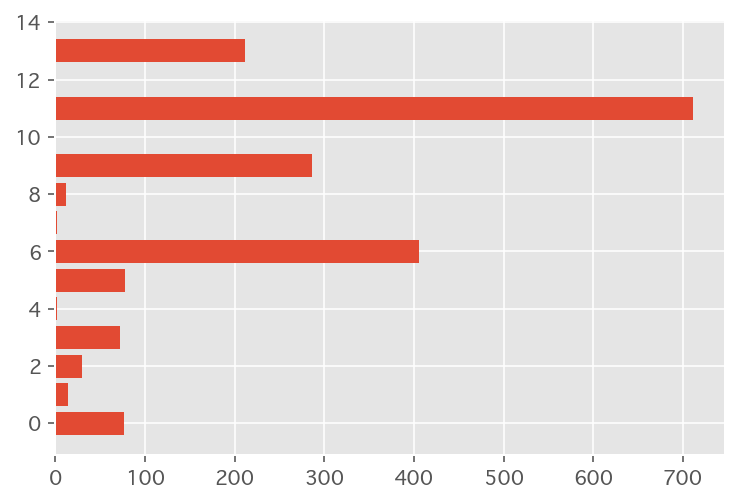

In [150]:
plt.barh(list(range(len(df["1000"]))), df["1000"])

In [139]:
df

,1001,1101,1110,1111,1011,1100,0010,1000,1010,0011,0101,0000,0100
1000,NaN,1.0,NaN,1.0,1.0,1.0,2.0,17.0,4.0,NaN,NaN,NaN,16.0
1001,NaN,NaN,NaN,NaN,2.0,NaN,1.0,4.0,2.0,NaN,NaN,NaN,4.0
1010,2.0,1.0,1.0,NaN,2.0,2.0,8.0,23.0,6.0,1.0,NaN,1.0,40.0
1011,NaN,1.0,NaN,NaN,NaN,NaN,5.0,7.0,1.0,NaN,NaN,NaN,14.0
1100,NaN,NaN,1.0,NaN,4.0,3.0,15.0,37.0,4.0,2.0,NaN,NaN,32.0
1101,1.0,2.0,1.0,NaN,3.0,4.0,19.0,35.0,9.0,2.0,NaN,NaN,52.0
1110,2.0,1.0,1.0,1.0,4.0,4.0,35.0,88.0,11.0,1.0,NaN,1.0,116.0
2000,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,4.0
2001,5.0,NaN,2.0,2.0,6.0,6.0,41.0,108.0,12.0,NaN,1.0,NaN,147.0
2010,15.0,3.0,9.0,3.0,4.0,23.0,105.0,216.0,34.0,6.0,11.0,4.0,316.0


In [109]:
curr = "1110"
before_set = set()
for elem in triple_transfer_list:
    if elem[1] == curr:
        before_set.add(elem[0])

In [110]:
ad_before_lst = [
    "0101",
    "0100",
]

dis_before_lst = [
    ""
]

In [111]:
before_set

{'0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1010',
 '1100',
 '1101',
 '1110',
 '1111'}

In [124]:
def decode_count(count):
    out = count[0]
    base = list(count[1:])
    out_comment = str(out) + "アウト"
    if out_comment == "3アウト":
        return out_comment + "チェンジ"
    if base == ["0", "0", "0"]:
        return out_comment + "ランナーなし"
    elif base == ["1", "1", "1"]:
        return out_comment + "満塁"
    base = [elem=="1" for elem in base]
    base_comment = ""
    for i in range(3):
        if base[i]:
            base_comment += str(i+1)
    return out_comment + base_comment + "塁"

In [125]:
def bar_and_df(ad_before, dis_before, after):
    ad = pd.DataFrame(sorted([[elem[0][0], elem[0][1], elem[0][2], elem[1]] for elem in list(Counter([elem for elem in triple_transfer_list if elem[0]==ad_before and elem[1]==after]).items())], key=lambda x: -x[-1]))
    dis = pd.DataFrame(sorted([[elem[0][0], elem[0][1], elem[0][2], elem[1]] for elem in list(Counter([elem for elem in triple_transfer_list if elem[0]==dis_before and elem[1]==after]).items())], key=lambda x: -x[-1]))
    ad[4] = ad[3] / sum(ad[3])
    dis[4] = dis[3] / sum(dis[3])
    con = pd.concat([ad.set_index(2), dis.set_index(2)], axis=1, join="outer").fillna(0)[4]
    con.columns = ["ad_rate", "dis_rate"]

    plt.figure(figsize=(12, 6))
    plt.bar(list(range(len(con.ad_rate))), con.ad_rate, tick_label=[decode_count(elem) for elem in con.index], width=0.35, align="center")
    plt.bar(np.array(list(range(len(con.dis_rate))))+0.35, con.dis_rate, tick_label=[decode_count(elem) for elem in con.index], width=0.35, align="center")
    plt.xticks(rotation=60)
    plt.legend([decode_count(ad[0][0]), decode_count(dis[0][0])])
    plt.title(decode_count(ad[1][0]) + "時の結果")
    plt.xlabel("プレーの結果")
    plt.ylabel("割合")
    plt.show()
    
    con = pd.concat([ad.set_index(2), dis.set_index(2)], axis=1, join="outer").fillna(0)[[3, 4]]
    con.columns = ["ad_num", "dis_num", "ad_rate", "dis_rate"]
    con["ad_num"] = con["ad_num"].astype(int)
    con["dis_num"] = con["dis_num"].astype(int)
    con["pvalue"] = [stats.ttest_ind(d1, d2).pvalue for d1, d2 in zip([[0] * (con["ad_num"].sum() - con["ad_num"][idx]) + [1] * con["ad_num"][idx] for idx in con.index], [[0] * (con["dis_num"].sum() - con["dis_num"][idx]) + [1] * con["dis_num"][idx] for idx in con.index])]
    con.index = [decode_count(elem) for elem in con.index]
    display(con.sort_values(by="pvalue"))

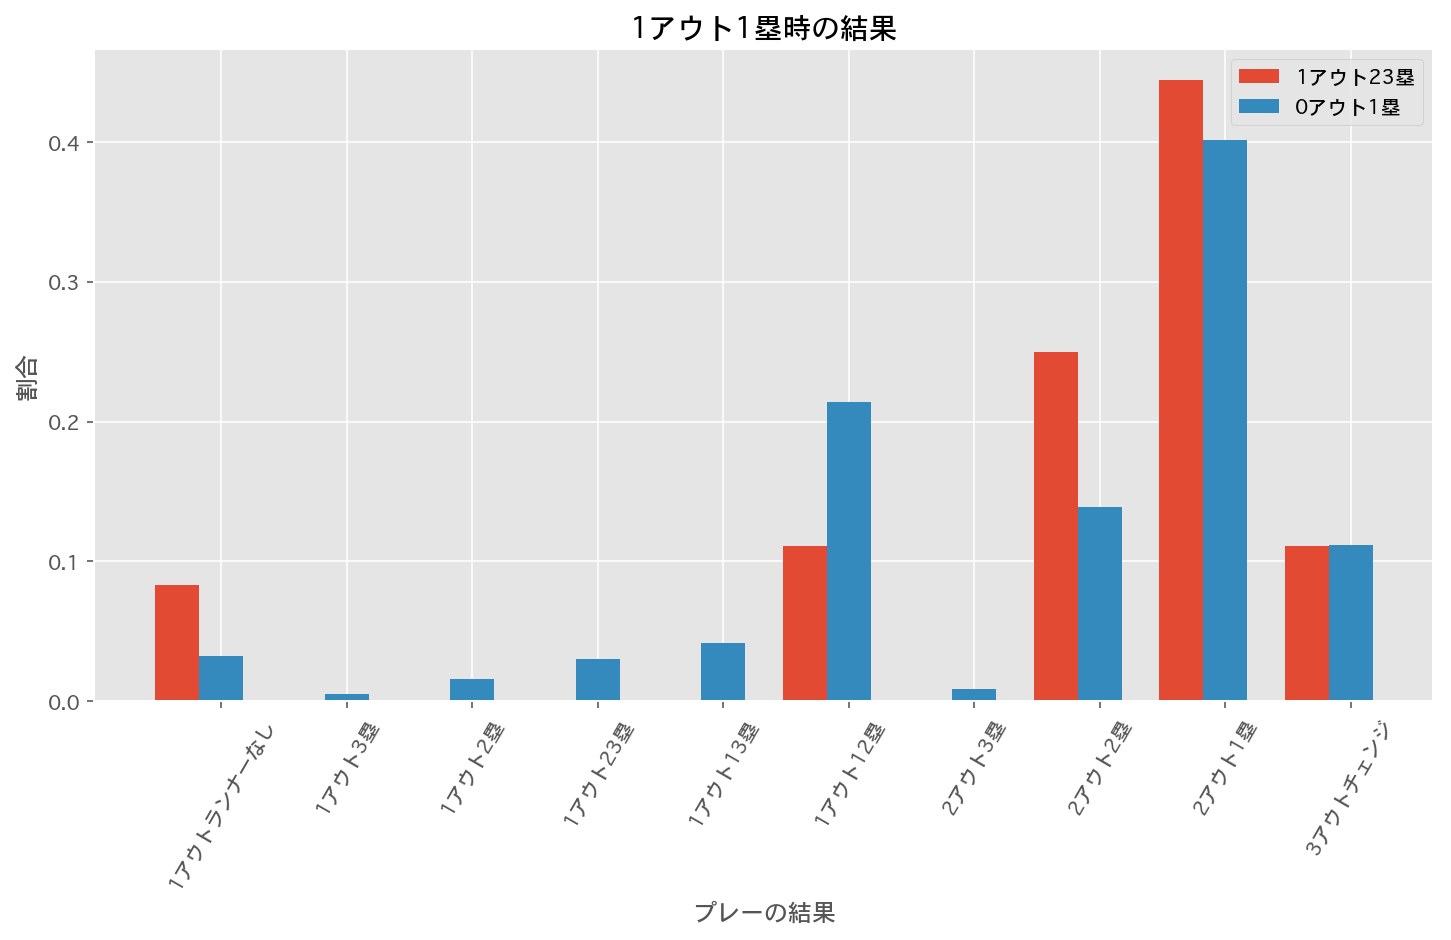

,ad_num,dis_num,ad_rate,dis_rate,pvalue
2アウト2塁,9,130,0.250000,0.139186,0.062697
1アウトランナーなし,3,30,0.083333,0.032120,0.096447
1アウト12塁,4,200,0.111111,0.214133,0.136937
1アウト13塁,0,39,0.000000,0.041756,0.211167
1アウト23塁,0,28,0.000000,0.029979,0.292282
1アウト2塁,0,15,0.000000,0.016060,0.444008
2アウト3塁,0,8,0.000000,0.008565,0.577580
2アウト1塁,16,375,0.444444,0.401499,0.606667
1アウト3塁,0,5,0.000000,0.005353,0.660235
3アウトチェンジ,4,104,0.111111,0.111349,0.996451


In [127]:
bar_and_df("1011", "0100", "1100")

In [9]:
# 2アウト3塁
#ad_before = "2000" 
#dis_before = "1001" 
#after = "2001"

# 1アウト3塁
#ad_before = "1000" 
#dis_before = "0001" 
#after = "1001"

# 2アウト2塁
#ad_before = "2000" 
#dis_before = "1010" 
#after = "2010"

# 1アウト2塁
#ad_before = "1000" 
#dis_before = "0010" 
#after = "1010"

# 2アウト1塁
#ad_before = "2000" 
#dis_before = "1100" 
#after = "2100"

# 1アウト1塁
#ad_before = "1000"
#dis_before = "0100"
#after = "1100"